# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Датасет был создан с помощью автогенерации.

In [2]:
data = pd.read_csv('data/data.csv', sep=",")

In [3]:
data.shape

(10001, 10)

In [4]:
data.dtypes

order_id        float64
make_id         float64
time_id         float64
this_id         float64
my_float        float64
not_null        float64
not_null_int      int64
not_null_str     object
customer         object
paid             object
dtype: object

In [5]:
data.isnull().sum()

order_id         720
make_id         1916
time_id          213
this_id          984
my_float        2178
not_null           0
not_null_int       0
not_null_str       0
customer         272
paid            4050
dtype: int64

In [6]:
data.head()

,order_id,make_id,time_id,this_id,my_float,not_null,not_null_int,not_null_str,customer,paid
0,1733.0,NaN,417.0,NaN,NaN,581.273750,1457,Jerald Shanahan,Reinger and Toy LLC,False
1,1639.0,1663.0,NaN,683.0,NaN,807.625546,1277,Lera Bruen,Gislason and Carter and Sons,NaN
2,1868.0,1998.0,1406.0,1710.0,1743.058166,1865.640517,1675,Melody Herzog,Strosin and Sons,False
3,978.0,481.0,1161.0,879.0,NaN,332.428079,681,Uriah Toy,Wunsch and Douglas LLC,True
4,602.0,686.0,1281.0,907.0,994.840977,780.223571,1199,Kira Kris,Dickinson LLC,False


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10001


# Обработка пропусков в данных

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)
data_new_1.head()

,not_null,not_null_int,not_null_str
0,581.273750,1457,Jerald Shanahan
1,807.625546,1277,Lera Bruen
2,1865.640517,1675,Melody Herzog
3,332.428079,681,Uriah Toy
4,780.223571,1199,Kira Kris


In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)
data_new_2.head()

,order_id,make_id,time_id,this_id,my_float,not_null,not_null_int,not_null_str,customer,paid
2,1868.0,1998.0,1406.0,1710.0,1743.058166,1865.640517,1675,Melody Herzog,Strosin and Sons,False
4,602.0,686.0,1281.0,907.0,994.840977,780.223571,1199,Kira Kris,Dickinson LLC,False
8,900.0,581.0,1221.0,1274.0,1610.464425,1035.599270,1028,Margie Champlin,Tromp and Wisoky Inc,False
10,448.0,1004.0,459.0,568.0,1038.267950,1517.854059,939,Arnaldo Schuppe,Greenholt and Rau and Sons,False
14,1341.0,1209.0,1094.0,1599.0,857.051858,626.583405,302,Kaycee Welch,Block and Veum Inc,False


In [10]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,order_id,make_id,time_id,this_id,my_float,not_null,not_null_int,not_null_str,customer,paid
0,1733.0,0.0,417.0,0.0,0.000000,581.273750,1457,Jerald Shanahan,Reinger and Toy LLC,False
1,1639.0,1663.0,0.0,683.0,0.000000,807.625546,1277,Lera Bruen,Gislason and Carter and Sons,0
2,1868.0,1998.0,1406.0,1710.0,1743.058166,1865.640517,1675,Melody Herzog,Strosin and Sons,False
3,978.0,481.0,1161.0,879.0,0.000000,332.428079,681,Uriah Toy,Wunsch and Douglas LLC,True
4,602.0,686.0,1281.0,907.0,994.840977,780.223571,1199,Kira Kris,Dickinson LLC,False


In [11]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка order_id. Тип данных float64. Количество пустых значений 720, 7.2%.
Колонка make_id. Тип данных float64. Количество пустых значений 1916, 19.16%.
Колонка time_id. Тип данных float64. Количество пустых значений 213, 2.13%.
Колонка this_id. Тип данных float64. Количество пустых значений 984, 9.84%.
Колонка my_float. Тип данных float64. Количество пустых значений 2178, 21.78%.


In [12]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,order_id,make_id,time_id,this_id,my_float
0,1733.0,NaN,417.0,NaN,NaN
1,1639.0,1663.0,NaN,683.0,NaN
2,1868.0,1998.0,1406.0,1710.0,1743.058166
3,978.0,481.0,1161.0,879.0,NaN
4,602.0,686.0,1281.0,907.0,994.840977
...,...,...,...,...,...
9996,1555.0,276.0,1995.0,1382.0,1606.885323
9997,1619.0,969.0,1041.0,1067.0,1384.289517
9998,1708.0,1698.0,390.0,376.0,1855.714368
9999,1791.0,956.0,1518.0,1113.0,1511.138422


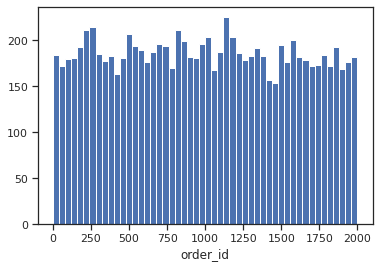

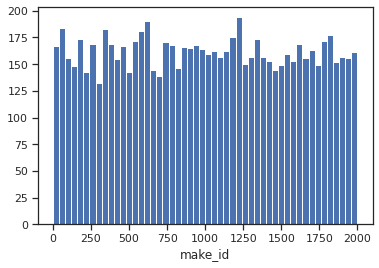

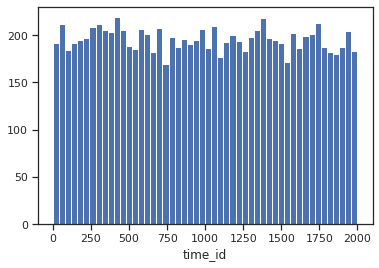

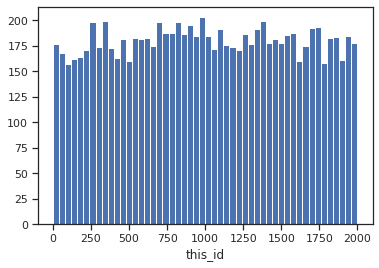

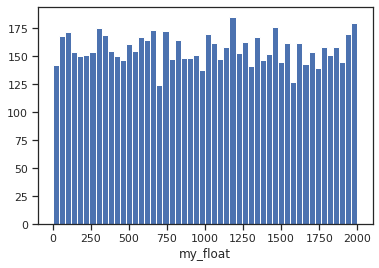

In [13]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

## Импутация данных

In [14]:
data_num_Order_id = data_num[['order_id']]
data_num_Order_id.head()

,order_id
0,1733.0
1,1639.0
2,1868.0
3,978.0
4,602.0


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Order_id)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [17]:
strategies=['mean', 'median', 'most_frequent']

In [18]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Order_id)
    return data_num_imp[mask_missing_values_only]

In [19]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176705, 989.60176705, 989.60176705,
        989.60176705, 989.60176

In [20]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 986., 986., 986., 986., 986., 986., 986., 986.,
        986., 986., 986., 9

In [21]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965., 1965.,
        1965., 1965., 1965., 1965., 1965., 1965., 1965., 19

In [22]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [23]:
data[['time_id']].describe()

,time_id
count,9788.000000
mean,991.904168
std,577.227854
min,0.000000
25%,483.000000
50%,991.500000
75%,1488.250000
max,1999.000000


In [24]:
test_num_impute_col(data, 'time_id', strategies[0])

('time_id', 'mean', 213, 991.904168369432, 991.904168369432)

In [25]:
test_num_impute_col(data, 'time_id', strategies[1])

('time_id', 'median', 213, 991.5, 991.5)

In [26]:
test_num_impute_col(data, 'time_id', strategies[2])

('time_id', 'most_frequent', 213, 105.0, 105.0)

## Обработка пропусков в категориальных данных

In [27]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка customer. Тип данных object. Количество пустых значений 272, 2.72%.
Колонка paid. Тип данных object. Количество пустых значений 4050, 40.5%.


In [28]:
cat_temp_data = data[['customer']]
cat_temp_data.head()

,customer
0,Reinger and Toy LLC
1,Gislason and Carter and Sons
2,Strosin and Sons
3,Wunsch and Douglas LLC
4,Dickinson LLC


In [29]:
cat_temp_data['customer'].unique()

array(['Reinger and Toy LLC', 'Gislason and Carter and Sons',
       'Strosin and Sons', ..., 'Hickle and Kuhlman LLC', 'Hamill Group',
       'Cole and Fritsch Inc'], dtype=object)

In [30]:
cat_temp_data[cat_temp_data['customer'].isnull()].shape

(272, 1)

In [31]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Reinger and Toy LLC'],
       ['Gislason and Carter and Sons'],
       ['Strosin and Sons'],
       ...,
       ['Hamill Group'],
       ['Hodkiewicz and Sons'],
       ['Cole and Fritsch Inc']], dtype=object)

In [32]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Abbott Group', 'Abbott Inc', 'Abbott LLC', ...,
       'Zulauf and Kovacek Group', 'Zulauf and Kunde Inc',
       'Zulauf and Sons'], dtype=object)

In [33]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Reinger and Toy LLC'],
       ['Gislason and Carter and Sons'],
       ['Strosin and Sons'],
       ...,
       ['Hamill Group'],
       ['Hodkiewicz and Sons'],
       ['Cole and Fritsch Inc']], dtype=object)

In [34]:

data_imp3[data_imp3=='NA'].size

272

In [35]:
np.unique(data_imp3)

array(['Abbott Group', 'Abbott Inc', 'Abbott LLC', ...,
       'Zulauf and Kovacek Group', 'Zulauf and Kunde Inc',
       'Zulauf and Sons'], dtype=object)

## Преобразование категориальных признаков в числовые

In [36]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Reinger and Toy LLC
1,Gislason and Carter and Sons
2,Strosin and Sons
3,Wunsch and Douglas LLC
4,Dickinson LLC
...,...
9996,Hickle and Kuhlman LLC
9997,Rath LLC
9998,Hamill Group
9999,Hodkiewicz and Sons


# 

## Кодирование категорий целочисленными значениями - label encoding

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [39]:
cat_enc['c1'].unique()

array(['Reinger and Toy LLC', 'Gislason and Carter and Sons',
       'Strosin and Sons', ..., 'Hickle and Kuhlman LLC', 'Hamill Group',
       'Cole and Fritsch Inc'], dtype=object)

In [40]:
np.unique(cat_enc_le)

array([   0,    1,    2, ..., 6619, 6620, 6621])

In [41]:
le.inverse_transform([0, 1, 2, 3])

array(['Abbott Group', 'Abbott Inc', 'Abbott LLC',
       'Abbott and Christiansen Inc'], dtype=object)

## Кодирование категорий наборами бинарных значений -

In [42]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [43]:
cat_enc.shape

(10001, 1)

In [44]:
cat_enc_ohe.shape

(10001, 6622)

In [45]:
cat_enc_ohe

<10001x6622 sparse matrix of type '<class 'numpy.float64'>'
	with 10001 stored elements in Compressed Sparse Row format>

In [46]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
cat_enc.head(10)

,c1
0,Reinger and Toy LLC
1,Gislason and Carter and Sons
2,Strosin and Sons
3,Wunsch and Douglas LLC
4,Dickinson LLC
5,Turcotte Group
6,Pollich LLC
7,Mertz LLC
8,Tromp and Wisoky Inc
9,Schuppe and Sons


## Pandas get_dummies - быстрый вариант one-hot кодирования

In [48]:
pd.get_dummies(cat_enc).head()

,c1_Abbott Group,c1_Abbott Inc,c1_Abbott LLC,c1_Abbott and Christiansen Inc,c1_Abbott and Emmerich Group,c1_Abbott and Hagenes and Sons,c1_Abbott and Herman Inc,c1_Abbott and McGlynn LLC,c1_Abbott and Rolfson and Sons,c1_Abbott and Sons,...,c1_Zieme and Schoen Group,c1_Zieme and Sons,c1_Zulauf Group,c1_Zulauf Inc,c1_Zulauf LLC,c1_Zulauf and Conn Inc,c1_Zulauf and Gerhold and Sons,c1_Zulauf and Kovacek Group,c1_Zulauf and Kunde Inc,c1_Zulauf and Sons
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,customer_Abbott Group,customer_Abbott Inc,customer_Abbott LLC,customer_Abbott and Christiansen Inc,customer_Abbott and Emmerich Group,customer_Abbott and Hagenes and Sons,customer_Abbott and Herman Inc,customer_Abbott and McGlynn LLC,customer_Abbott and Rolfson and Sons,customer_Abbott and Sons,...,customer_Zieme and Sons,customer_Zulauf Group,customer_Zulauf Inc,customer_Zulauf LLC,customer_Zulauf and Conn Inc,customer_Zulauf and Gerhold and Sons,customer_Zulauf and Kovacek Group,customer_Zulauf and Kunde Inc,customer_Zulauf and Sons,customer_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Масштабирование данных

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## MinMax

In [51]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['my_float']])

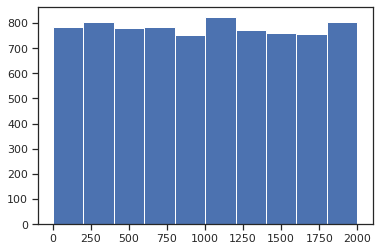

In [52]:
plt.hist(data['my_float'])
plt.show()

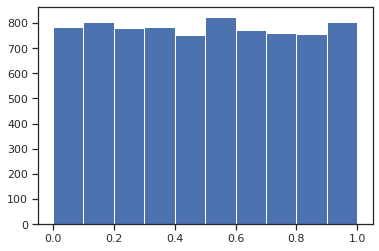

In [53]:
plt.hist(sc1_data)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [54]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['my_float']])

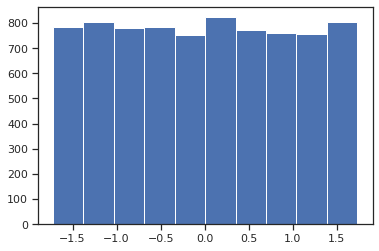

In [55]:
plt.hist(sc2_data)
plt.show()